# Projet Apprentissage Automatique - Reseau de Neuronnes

### RODRIGUES PEREIRA Lucas /// Étudiant: 21810878

Ici, j'implémente l'exemple du OR avec un unique neurone, en suivant les pas apprix dans le cours:

- 1°) Mettre un exemple à apprendre en entrée du réseau.
- 2°) Calculer les valeurs d’activation des neurones cachés et de sortie avec (1a) et (1b).
- 3°) Calculer l’erreur entre la valeur de l'exemple et celle du réseau avec (2) et (3).
- 4°) Mettre à jour les poids des connexions allant sur l’unité de sortie avec (4).
- 5°) Calculer l’erreur dans les unités de la couche cachée avec (5).
- 6°) Mettre à jour les poids des connexions allant sur la couche cachée avec (6).


J'ai tout implementé, sans utiliser des librairies externes, sauf pour desiner les graphes et Numpy.

## « Backprop » sur l’exemple du OR avec un unique neurone 

![fig1.png](fig1.png)



In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap, subplots
from numpy import linspace, meshgrid, c_
from IPython.display import clear_output

In [92]:
def perceptron_decision_boundary(x,w1,w2,b):
    y = (-(b / w2) / (b / w1))*x + (-b / w2)
    print('x=',x,'; y=',y)
    return y

In [136]:
A_train = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])

A_labels = np.array([[1],
             [1],
             [1],
             [0]])

learning_rate = 0.1
input_size = 2
hidden_size = 1
output_size = 1

weights_0_1 = 2*np.random.random((input_size,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,output_size)) - 1
bias_1 = np.ones((1,hidden_size))
bias_2 = np.ones((1,output_size))

Error: 0.07579681018571531
Decision curve 1: [[-2.83559092]
 [-2.83099098]] bias: [[3.68897468]]
x= 0 ; y= 1.3030683298762822
x= 1 ; y= 0.30144347657204795


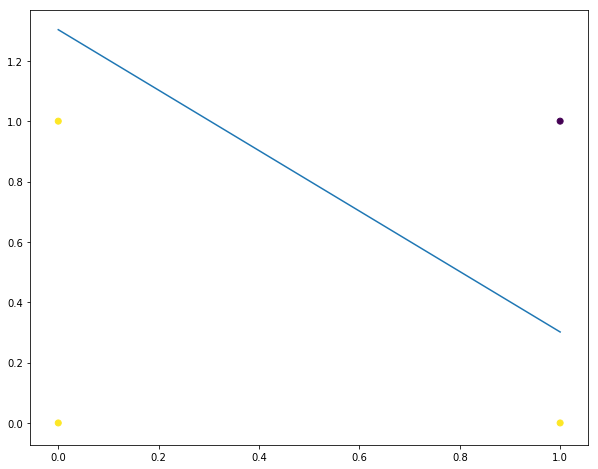

In [137]:
import numpy as np
import math

np.random.seed(1)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))


# f’(netk) = ok (1 – ok)
def sigmoid2deriv(output):
    return output*(1-output)
    

for iteration in range(2000): 
    layer_2_error = 0
    for i in range(len(A_train)):
        
        # Forward propagation
        layer_0 = A_train[i:i+1]
        net_1 = np.dot(layer_0, weights_0_1) + bias_1
        layer_1 = sigmoid(net_1)
        net_2 = np.dot(layer_1, weights_1_2) + bias_2
        layer_2 = sigmoid(net_2)
        
        #Backpropagation
        layer_2_error += np.sum((layer_2 - A_labels[i]) ** 2)
        
        
        # dk = (tk – ok) f’(netk)
        layer_2_delta = (A_labels[i] - layer_2) * sigmoid2deriv(layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * sigmoid2deriv(layer_1)

        # delta_wjk = learning_rate * dk * oj
        weights_1_2 += learning_rate * layer_1.T.dot(layer_2_delta)
        weights_0_1 += learning_rate * layer_0.T.dot(layer_1_delta)
        
        # Pareil pour les biais
        bias_2 += learning_rate * layer_2_delta
        bias_1 += learning_rate * layer_1_delta
        
    if(iteration % 10 == 0):
        clear_output(wait=True)
        print("Error:", str(layer_2_error))
        print("Decision curve 1:", weights_0_1,"bias:",bias_1)
        plt.scatter(A_train[:,0],A_train[:,1], c=A_labels)
        plt.plot([0,1],[perceptron_decision_boundary(0,weights_0_1[0,0],weights_0_1[1,0],bias_1[0,0]),perceptron_decision_boundary(1,weights_0_1[0,0],weights_0_1[1,0],bias_1[0,0])])
        plt.show()
        

## Exercise 2 de l'examen de 2018

![fig2.png](fig2.png)

Là, j'ai utilisé un reseau de neuronnes avec 1 couche cachée pour apprendre diviser les données suivants:

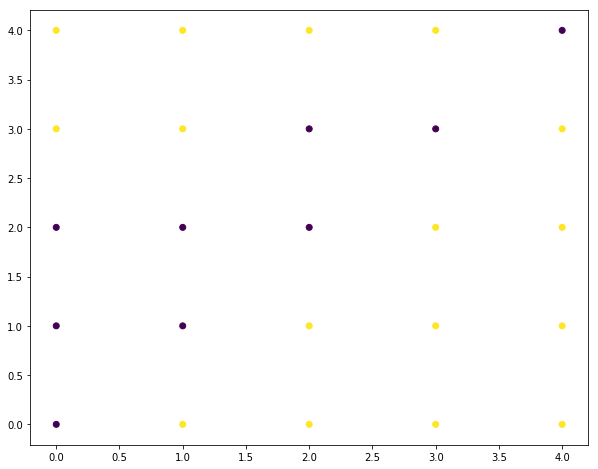

In [133]:
A_train = np.array([[0,0],[0,1],[0,2],[0,3],[0,4],[1,0],[1,1],[1,2],[1,3],[1,4],[2,0],[2,1],[2,2],[2,3],[2,4],[3,0],[3,1],[3,2],[3,3],[3,4],[4,0],[4,1],[4,2],[4,3],[4,4]])
A_labels = np.array([[0],[0],[0],[1],[1],[1],[0],[0],[1],[1],[1],[1],[0],[0],[1],[1],[1],[1],[0],[1],[1],[1],[1],[1],[0]])


plt.scatter(A_train[:,0],A_train[:,1], c=A_labels)
plt.show()

J'ai utilisé la fonction d'activation sigmoid pour les neuronnes des couches cachées et pour la sortie du reseau.

Presenting: [[4 4]] Label: [0]
Error: 0.2963152820123855
Decision curve 1: [[ 1.68147747  4.66015226]
 [-3.17078831 -5.13004347]] bias: [[ 6.78794117 -1.62528808]]
x= 0 ; y= -0.3168176045085366
x= 4 ; y= 3.3167985946663294
x= 0 ; y= 2.140774000229785
x= 4 ; y= 4.261984629031836


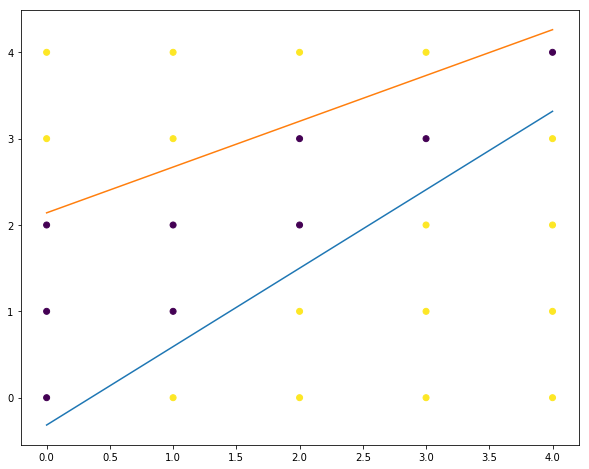

In [126]:
import numpy as np
import math

np.random.seed(1)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid2deriv(output):
    return output*(1-output)
    

learning_rate = 0.1
input_size = 2
hidden_size = 2
output_size = 1

weights_0_1 = 2*np.random.random((input_size,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,output_size)) - 1

bias_1 = np.ones((1,hidden_size))
bias_2 = np.ones((1,output_size))

for iteration in range(2000): 
    layer_2_error = 0
    for i in range(len(A_train)):
        #Forward propagation
        layer_0 = A_train[i:i+1]
        net_1 = np.dot(layer_0, weights_0_1) + bias_1
        layer_1 = sigmoid(net_1)
        net_2 = np.dot(layer_1, weights_1_2) + bias_2
        layer_2 = sigmoid(net_2)
            
        #Backpropagation
        layer_2_error += np.sum((layer_2 - A_labels[i]) ** 2)
    
        layer_2_delta = (A_labels[i] - layer_2) * sigmoid2deriv(layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * sigmoid2deriv(layer_1)
        
        weights_1_2 += learning_rate * layer_1.T.dot(layer_2_delta)
        weights_0_1 += learning_rate * layer_0.T.dot(layer_1_delta)

        bias_2 += learning_rate * layer_2_delta
        bias_1 += learning_rate * layer_1_delta
        
    if(iteration % 10 == 0):
        clear_output(wait=True)
        print("Error:", str(layer_2_error))
        print("Decision curve 1:", weights_0_1,"bias:",bias_1)

        plt.scatter(A_train[:,0],A_train[:,1], c=A_labels)
        plt.plot([0,4],[perceptron_decision_boundary(0,weights_0_1[0,1],weights_0_1[1,1],bias_1[0,1]),perceptron_decision_boundary(4,weights_0_1[0,1],weights_0_1[1,1],bias_1[0,1])])
        plt.plot([0,4],[perceptron_decision_boundary(0,weights_0_1[0,0],weights_0_1[1,0],bias_1[0,0]),perceptron_decision_boundary(4,weights_0_1[0,0],weights_0_1[1,0],bias_1[0,0])])
        plt.show()
        